In [1]:
import os
import numpy as np
import torch

In [2]:
from torch.utils.data import DataLoader
from generate_data import generate_op_data
from utils import load_model
from problems import OP

In [3]:
model, _ = load_model('outputs/op_34/op34_falcon_ML3.6_20210112T022317')
torch.manual_seed(1234)
# dataset_1 = OP.make_dataset(size=34, num_samples=1,distribution='falcon')
dataset = OP.make_dataset(filename="asist\\falcon_hard_new.pkl")



  [*] Loading model from outputs/op_34/op34_falcon_ML3.6_20210112T022317\epoch-99.pt


In [4]:
print(dataset.data)
# print(dataset_1.data)

[{'loc': tensor([[0.4729, 0.5817],
        [0.4037, 0.8645],
        [0.2203, 0.7974],
        [0.0828, 0.8564],
        [0.4466, 0.9222],
        [0.4557, 0.9014],
        [0.1174, 0.5750],
        [0.7114, 0.2226],
        [0.7135, 0.2025],
        [0.7127, 0.2010],
        [0.5919, 0.3157],
        [0.6013, 0.2952],
        [0.5118, 0.3890],
        [0.4836, 0.4241],
        [0.3462, 0.2262],
        [0.3744, 0.2294],
        [0.3510, 0.2187],
        [0.0662, 0.2588],
        [0.0674, 0.2579],
        [0.1264, 0.0991],
        [0.1213, 0.0990],
        [0.0000, 0.0000],
        [0.7668, 0.5624],
        [0.8700, 0.7062],
        [0.3986, 0.4856],
        [0.4186, 0.4451],
        [0.4787, 0.4940],
        [0.3470, 0.4259],
        [0.4008, 0.4719],
        [0.3973, 0.4768],
        [0.2460, 0.5474],
        [0.2807, 0.4724],
        [0.3359, 0.5718],
        [0.2998, 0.4367]]), 'prize': tensor([0.1000, 0.3000, 0.1000, 0.1000, 0.1000, 0.3000, 0.1000, 0.1000, 0.3000,
        0.1000, 

In [5]:
# Need a dataloader to batch instances
dataloader = DataLoader(dataset, batch_size=1)

# Make var works for dicts
batch = next(iter(dataloader))

# print(type(batch))
# print(batch)

# batch["max_length"] = torch.tensor([4.4])
# batch["loc"] = torch.tensor(loc).unsqueeze(0)



In [6]:
print(batch)
# print(torch.from_numpy(falcon_loc).unsqueeze(0))
# torch.eq(batch['loc'], torch.from_numpy(falcon_loc).unsqueeze(0))

# print(batch['loc'].shape)
# torch.from_numpy(falcon_loc).unsqueeze(0).shape

{'loc': tensor([[[0.4729, 0.5817],
         [0.4037, 0.8645],
         [0.2203, 0.7974],
         [0.0828, 0.8564],
         [0.4466, 0.9222],
         [0.4557, 0.9014],
         [0.1174, 0.5750],
         [0.7114, 0.2226],
         [0.7135, 0.2025],
         [0.7127, 0.2010],
         [0.5919, 0.3157],
         [0.6013, 0.2952],
         [0.5118, 0.3890],
         [0.4836, 0.4241],
         [0.3462, 0.2262],
         [0.3744, 0.2294],
         [0.3510, 0.2187],
         [0.0662, 0.2588],
         [0.0674, 0.2579],
         [0.1264, 0.0991],
         [0.1213, 0.0990],
         [0.0000, 0.0000],
         [0.7668, 0.5624],
         [0.8700, 0.7062],
         [0.3986, 0.4856],
         [0.4186, 0.4451],
         [0.4787, 0.4940],
         [0.3470, 0.4259],
         [0.4008, 0.4719],
         [0.3973, 0.4768],
         [0.2460, 0.5474],
         [0.2807, 0.4724],
         [0.3359, 0.5718],
         [0.2998, 0.4367]]]), 'prize': tensor([[0.1000, 0.3000, 0.1000, 0.1000, 0.1000, 0.3000, 0.100

In [7]:
# Run the model
model.eval()
model.set_decode_type('greedy')
with torch.no_grad():
    length, log_p, pi = model(batch, return_pi=True)
tour = pi

tensor([[ 2,  5,  6,  1, 25, 30, 29, 26, 27, 14, 13, 11, 12,  8, 10,  9, 16, 17,
         15, 20, 21, 19, 18, 34, 28, 32, 31, 33,  7,  3,  4,  0]])
tensor([[0.0000, 0.1000, 0.3000, 0.1000, 0.1000, 0.1000, 0.3000, 0.1000, 0.1000,
         0.3000, 0.1000, 0.3000, 0.1000, 0.1000, 0.1000, 0.3000, 0.1000, 0.1000,
         0.1000, 0.1000, 0.3000, 0.1000, 0.1000, 0.3000, 0.1000, 0.1000, 0.3000,
         0.3000, 0.1000, 0.1000, 0.3000, 0.1000, 0.1000, 0.1000, 0.1000]])
tensor([[0.3000, 0.1000, 0.3000, 0.1000, 0.1000, 0.3000, 0.1000, 0.3000, 0.3000,
         0.1000, 0.1000, 0.3000, 0.1000, 0.1000, 0.1000, 0.3000, 0.1000, 0.1000,
         0.3000, 0.3000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000, 0.1000, 0.1000, 0.1000, 0.0000]])
Length: tensor([3.5951])


In [18]:
print(tour[0].tolist())
print(len(tour[0]))

[2, 5, 6, 1, 25, 30, 29, 26, 27, 14, 13, 11, 12, 8, 10, 9, 16, 17, 15, 20, 21, 19, 18, 34, 28, 32, 31, 33, 7, 3, 4, 0]
32


[[0.05736483 1.        ]
 [0.472912   0.5816615 ]
 [0.40365717 0.8644731 ]
 [0.22030163 0.7974031 ]
 [0.08278068 0.8563841 ]
 [0.44663534 0.9222201 ]
 [0.45574927 0.90137357]
 [0.11738964 0.57504076]
 [0.71142006 0.2225856 ]
 [0.7134688  0.20249085]
 [0.7126549  0.20101467]
 [0.5919272  0.31567425]
 [0.60134035 0.29519147]
 [0.51176435 0.3889642 ]
 [0.48358557 0.42414752]
 [0.34616503 0.22624835]
 [0.37441286 0.22939777]
 [0.35101557 0.21867356]
 [0.06620949 0.258822  ]
 [0.06737387 0.25788203]
 [0.12635928 0.0991072 ]
 [0.12129636 0.09897687]
 [0.         0.        ]
 [0.7668413  0.5624236 ]
 [0.8700246  0.70617694]
 [0.39860058 0.48561266]
 [0.4185833  0.4451394 ]
 [0.47874188 0.49398345]
 [0.3470113  0.42591155]
 [0.40078345 0.4719477 ]
 [0.39733586 0.47676754]
 [0.2460441  0.54736954]
 [0.28074887 0.4723779 ]
 [0.33594453 0.57175654]
 [0.299784   0.4366826 ]]
[[0.40365717]
 [0.44663534]
 [0.45574927]
 [0.472912  ]
 [0.39860058]
 [0.39733586]
 [0.40078345]
 [0.4185833 ]
 [0.47874188

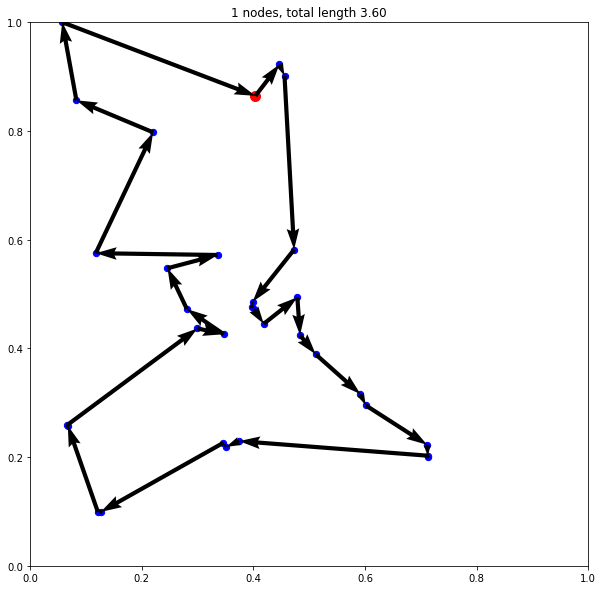

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# Code inspired by Google OR Tools plot:
# https://github.com/google/or-tools/blob/fb12c5ded7423d524fc6c95656a9bdc290a81d4d/examples/python/cvrptw_plot.py

def plot_op(xy, tour, ax1):
    """
    Plot the TSP tour on matplotlib axis ax1.
    """
    
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    
    xs, ys = xy[tour].transpose()
    print(xs, ys)
    dx = np.roll(xs, -1) - xs
    dy = np.roll(ys, -1) - ys
    d = np.sqrt(dx * dx + dy * dy)
    lengths = d.cumsum()
    
    # Scatter nodes
    ax1.scatter(xs, ys, s=40, color='blue')
    # Starting node
    ax1.scatter([xs[0]], [ys[0]], s=100, color='red')
    
    print(xs[0], ys[0])
    
    # Arcs
    qv = ax1.quiver(
        xs, ys, dx, dy,
        scale_units='xy',
        angles='xy',
        scale=1,
    )
    
    ax1.set_title('{} nodes, total length {:.2f}'.format(len(tour), lengths[-1]))
    
fig, ax = plt.subplots(figsize=(10, 10))

xy = torch.cat((dataset.data[0]['depot'].unsqueeze(0), dataset.data[0]['loc']))
# xy = torch.cat((dataset.data[0]['loc'], dataset.data[0]['depot'].unsqueeze(0)))

xy = xy.detach().cpu().numpy()
print(xy)
plot_op(xy, tour, ax)

  [*] Loading model from outputs/op_34/op34_falcon_ML3.6_20210112T022317\epoch-36.pt
{'loc': tensor([[[0.0290, 0.4019],
         [0.2598, 0.3666],
         [0.0583, 0.7006],
         [0.0518, 0.4681],
         [0.6738, 0.3315],
         [0.7837, 0.5631],
         [0.7749, 0.8208],
         [0.2793, 0.6817],
         [0.2837, 0.6567],
         [0.2388, 0.7313],
         [0.6012, 0.3043],
         [0.2548, 0.6294],
         [0.9665, 0.7399],
         [0.4517, 0.4757],
         [0.7842, 0.1525],
         [0.6662, 0.3343],
         [0.7893, 0.3216],
         [0.5247, 0.6688],
         [0.8436, 0.4265],
         [0.9561, 0.0770],
         [0.4108, 0.0014],
         [0.5414, 0.6419],
         [0.2976, 0.7077],
         [0.4189, 0.0655],
         [0.8839, 0.8083],
         [0.7528, 0.8988],
         [0.6839, 0.7658],
         [0.9149, 0.3993],
         [0.1100, 0.2541],
         [0.4333, 0.4451],
         [0.4966, 0.7865],
         [0.6604, 0.1303],
         [0.3498, 0.3824],
         [0.8043

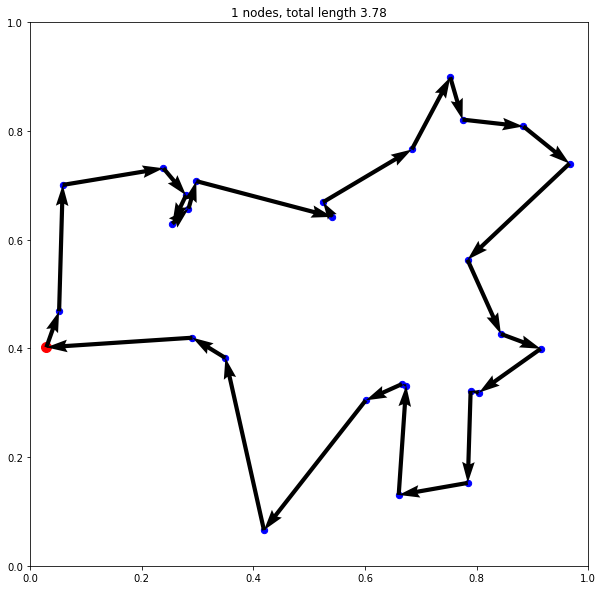

In [16]:
model, _ = load_model('outputs/op_34/op34_falcon_ML3.6_20210112T022317')
torch.manual_seed(1234)
dataset = OP.make_dataset(size=34, num_samples=1,distribution='falcon')

# Need a dataloader to batch instances
dataloader = DataLoader(dataset, batch_size=1)

# Make var works for dicts
batch = next(iter(dataloader))

print(batch)

model.eval()
model.set_decode_type('greedy')
with torch.no_grad():
    length, log_p, pi = model(batch, return_pi=True)
tour = pi

print(tour)
print(len(tour[0]))
xy = torch.cat((dataset.data[0]['depot'].unsqueeze(0), dataset.data[0]['loc']))
# xy = torch.cat((dataset.data[0]['loc'], dataset.data[0]['depot'].unsqueeze(0)))

fig, ax = plt.subplots(figsize=(10, 10))
xy = xy.detach().cpu().numpy()
print(xy)
plot_op(xy, tour, ax)

In [ ]:
falcon_loc = torch.tensor([
       [ 20.6102059 ,  31.91530012],
       [-24.82683278,  -4.78746884],
       [ 24.17850541,  49.05717035],
       [  1.45969915,  72.78633127],
       [  3.43574141,  42.56627212],
       [ 12.47764185,  69.27803919],
       [ 35.50124599,  25.59998899],
       [ 23.0058867 ,  48.86996025],
       [ 12.1408614 ,  30.1655649 ],
       [ 40.0542952 ,  65.91180674],
       [ 22.49100768,  34.18125234],
       [ -7.30705803,  36.06143914],
       [ 17.82562128,  45.8602939 ],
       [-34.97292559,   8.31153659],
       [ 24.05112214,  78.29872076],
       [ 10.09577404,  49.71123309],
       [ 23.63705117,  46.62021749],
       [ -0.21536384,  68.54767366],
       [ -1.2161314 ,  76.63272889],
       [  9.15031545,  26.35284728],
       [  2.6122354 ,  46.68651782],
       [  4.4979379 ,  46.66366303],
       [ 15.47117298,  84.24041972],
       [ 11.54893471,  81.58482544],
       [ 11.9787113 ,  67.62155076],
       [ 16.63001036,  80.83147188],
       [  6.05508296,  -8.94100443],
       [ 27.9096933 ,  50.2475556 ],
       [ 38.72615005,  68.97831297],
       [ 34.20398327,  64.06892671],
       [ 42.99479479,  68.23489545],
       [ 58.96318006,  79.01135847],
       [ 27.28403194,  54.19336332],
       [ 56.78558817, 115.52234698]])

In [ ]:
loc = falcon_loc.tolist()

loc_all = loc.copy()

lx = min(loc_all, key=lambda x:x[0])[0]
lz = min(loc_all, key=lambda x:x[1])[1]
rx = max(loc_all, key=lambda x:x[0])[0]
rz = max(loc_all, key=lambda x:x[1])[1]
span = max(rx - lx, rz - lz)

for l in loc:
    l[0] = (l[0] - lx) / span
    l[1] = (l[1] - lz) / span

print(loc)

print(np.array(loc))